# Project 6 – Custom EDA (Seaborn *titanic* dataset)

**Name:** Abdelhafidh Mahouel  
**Course:** Data Analytics Fundamentals (Project 6)  
**Dataset:** `seaborn.load_dataset("titanic")`  
**Goal:** Explore patterns related to survival (e.g., class, sex, age, fare) and practice a clean EDA workflow using **uv** + **pyproject.toml**.

> This notebook intentionally uses a **different dataset** than my earlier EDA project.


In [14]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display options
pd.set_option("display.max_columns", 50)


In [15]:
# Load data (different from Project 4)
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. Understand the data

In [16]:
df.shape

(891, 15)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [18]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Data quality checks

In [19]:
# Missing values
df.isna().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [20]:
# Duplicate rows
df.duplicated().sum()

np.int64(107)

## 3. Basic distributions

We'll look at a few key numeric variables and how survival varies across groups.


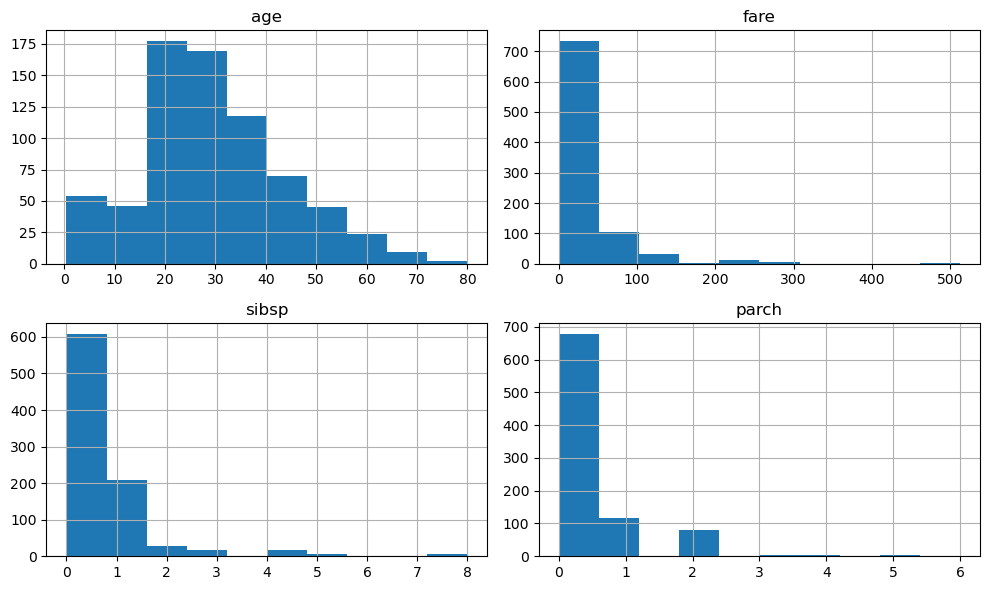

In [21]:
# Histograms for numeric variables
numeric_cols = ["age", "fare", "sibsp", "parch"]
df[numeric_cols].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()


## 4. Survival rate (overall and by groups)

In [22]:
# Overall survival rate
df["survived"].mean()

np.float64(0.3838383838383838)

In [23]:
# Survival rate by sex
(df.groupby("sex")["survived"].mean()
   .sort_values(ascending=False))

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [24]:
# Survival rate by class
(df.groupby("class")["survived"].mean()
   .sort_values(ascending=False))

C:\Users\hafid\AppData\Local\Temp\ipykernel_17740\1424904532.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby("class")["survived"].mean()


class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

In [25]:
# Survival rate by embarked port
(df.groupby("embark_town")["survived"].mean()
   .sort_values(ascending=False))

embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: survived, dtype: float64

## 5. Visualizations

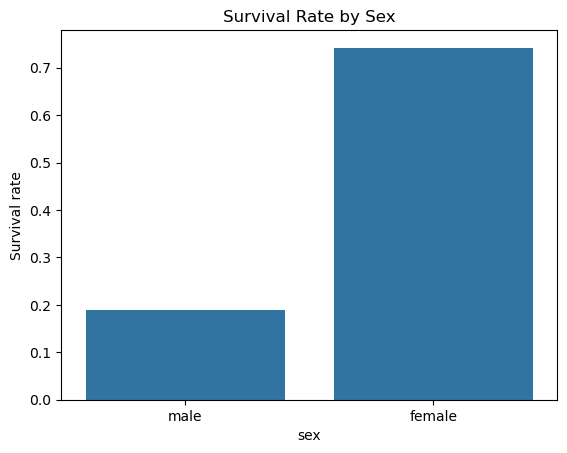

In [26]:
# Survival by sex (bar chart)
sns.barplot(data=df, x="sex", y="survived", errorbar=None)
plt.title("Survival Rate by Sex")
plt.ylabel("Survival rate")
plt.show()


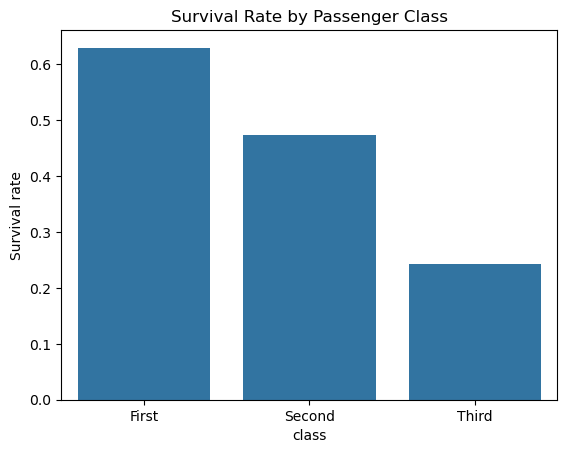

In [27]:
# Survival by class (bar chart)
sns.barplot(data=df, x="class", y="survived", errorbar=None)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival rate")
plt.show()


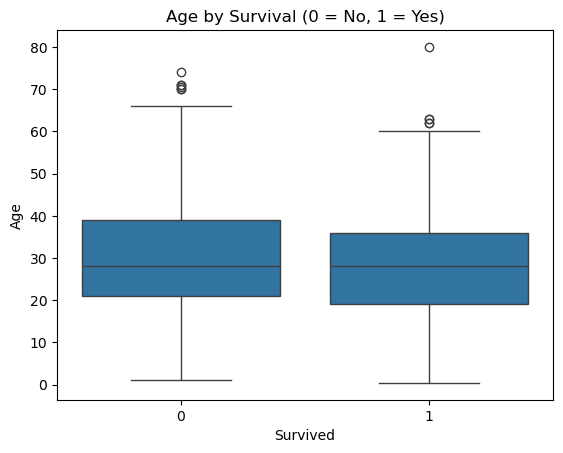

In [28]:
# Age distribution by survival (boxplot)
sns.boxplot(data=df, x="survived", y="age")
plt.title("Age by Survival (0 = No, 1 = Yes)")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()


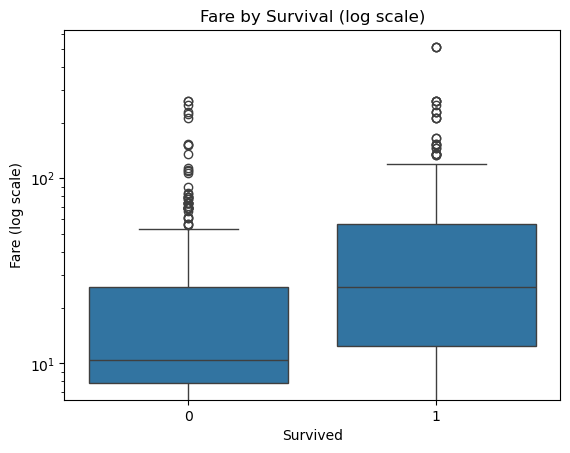

In [29]:
# Fare distribution by survival (boxplot, log scale helps)
sns.boxplot(data=df, x="survived", y="fare")
plt.yscale("log")
plt.title("Fare by Survival (log scale)")
plt.xlabel("Survived")
plt.ylabel("Fare (log scale)")
plt.show()


In [30]:
# Survival by sex and class (stacked proportion via crosstab)
ct = pd.crosstab(index=[df["class"], df["sex"]], columns=df["survived"], normalize="index")
ct

survived              0         1
class  sex                       
First  female  0.031915  0.968085
       male    0.631148  0.368852
Second female  0.078947  0.921053
       male    0.842593  0.157407
Third  female  0.500000  0.500000
       male    0.864553  0.135447

## 6. Correlation (numeric only)

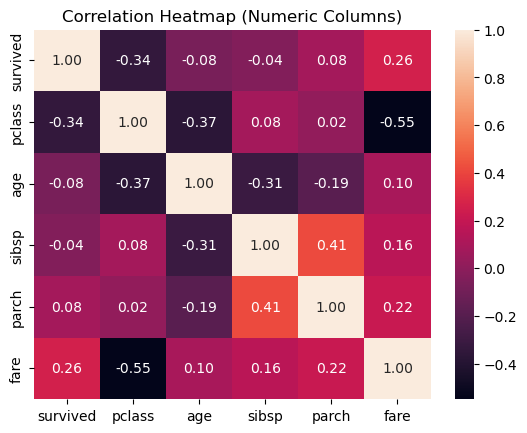

In [31]:
# Correlation heatmap for numeric columns
corr = df.select_dtypes(include=[np.number]).corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()


## 7. Short conclusion

**What I noticed (example points to refine):**
- Survival was higher for **women** than men.
- Survival was higher for **1st class** than 2nd/3rd class.
- **Fare** tends to be higher among survivors (likely connected to class).
- Age shows overlap, but children appear to have some survival advantage.

**Next steps (optional):**
- Build a simple model (logistic regression) after cleaning missing values.
- Try feature engineering like family size (`sibsp + parch + 1`).
